In [1]:
print("""
@Description: Density and Contour Plots
@Author:Stephen CUI
@Time: 2023-04-06 21:54:26
""")


@Description: Density and Contour Plots
@Author:Stephen CUI
@Time: 2023-04-06 21:54:26



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray

# Density and Contour Plots

## Visualizing a Three-Dimensional Function

In [3]:
def f(x: ndarray, y: ndarray) -> ndarray:
    return np.sin(x) ** 10 + np.cos(10 + x * y) * np.cos(x)


In [4]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)

In [5]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

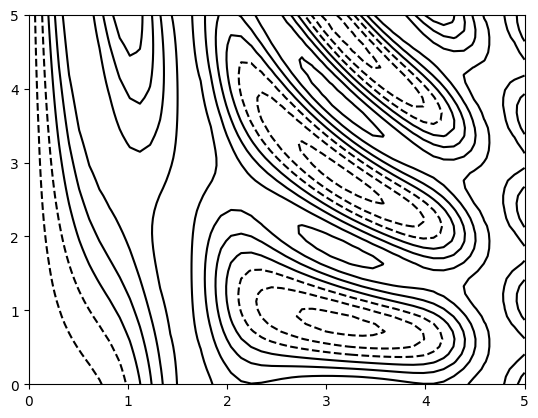

In [6]:
plt.contour(X, Y, Z, colors='black')

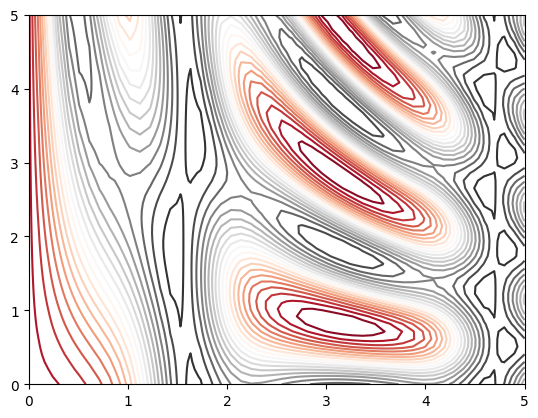

In [7]:
plt.contour(X, Y, Z, 20, cmap='RdGy')

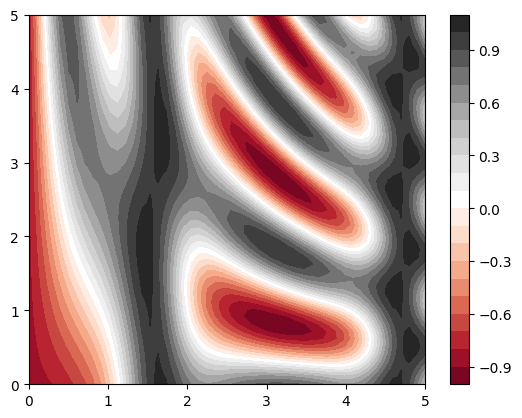

In [8]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

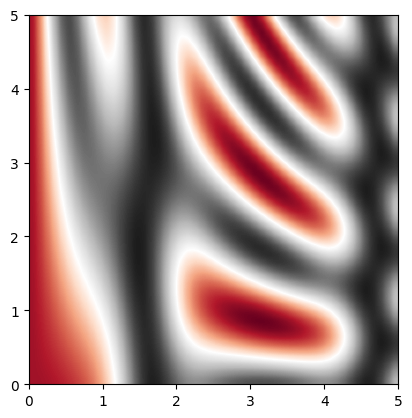

In [9]:
plt.imshow(Z, extent=[0, 5, 0, 5], cmap='RdGy', interpolation='gaussian',
           aspect='equal', origin='lower')

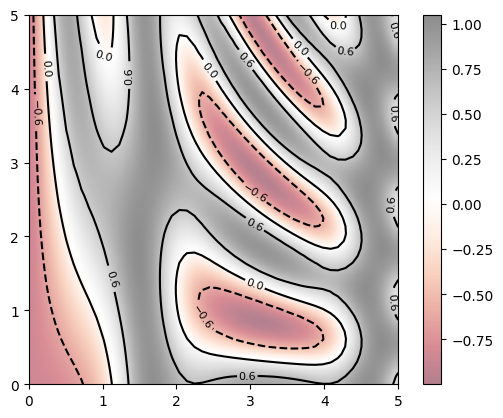

In [10]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', aspect='equal', cmap='RdGy', alpha=.5, interpolation='gaussian')
plt.colorbar()

## Histograms, Binnings, and Density

In [15]:
rng = np.random.default_rng(1701)
data = rng.normal(size=1000)

(array([  6.,  17.,  71., 170., 245., 246., 157.,  67.,  17.,   4.]),
 array([-3.26668015, -2.60694432, -1.94720849, -1.28747266, -0.62773683,
         0.031999  ,  0.69173484,  1.35147067,  2.0112065 ,  2.67094233,
         3.33067816]),
 <BarContainer object of 10 artists>)

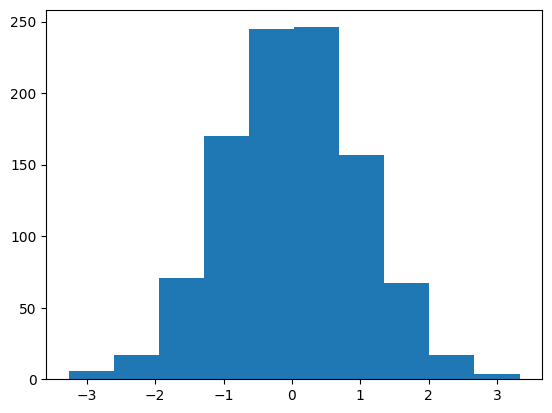

In [16]:
plt.hist(data)

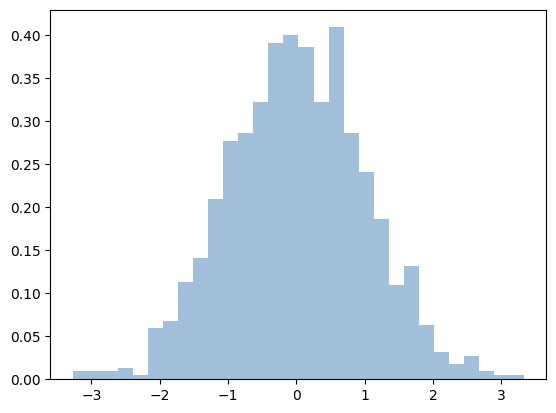

In [19]:
plt.hist(data, bins=30, density=True, alpha=.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')
plt.show()

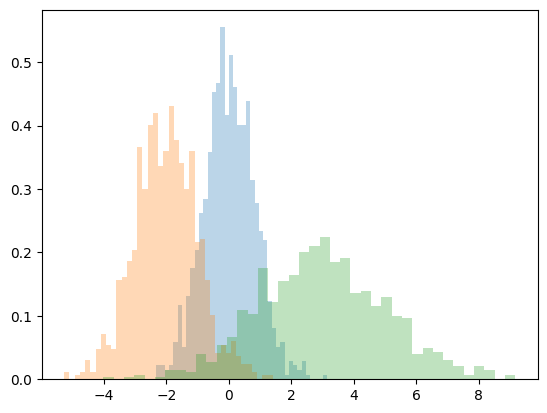

In [22]:
x1 = rng.normal(0, .8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=.3, density=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.show()

## Two-Dimensional Histograms and Binnings

In [42]:
mean = [0, 0]
cov = [[1, 1],
       [1, 2]]
x, y = rng.multivariate_normal(mean, cov, size=10000).T

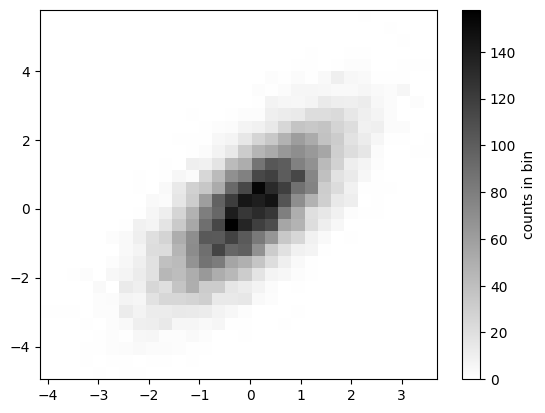

In [47]:
plt.hist2d(x, y, bins=30, cmap=plt.cm.binary)
cb = plt.colorbar()
cb.set_label('counts in bin')

In [48]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
counts.shape

(30, 30)

### plt.hexbin: Hexagonal Binnings


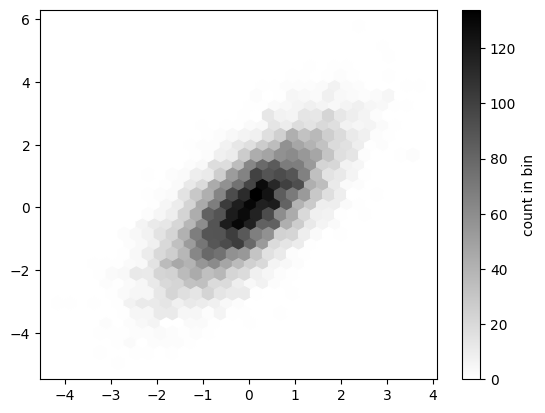

In [52]:
plt.hexbin(x, y, gridsize=30, cmap=plt.cm.binary)
cb = plt.colorbar(label='count in bin')

### Kernel Density Estimation

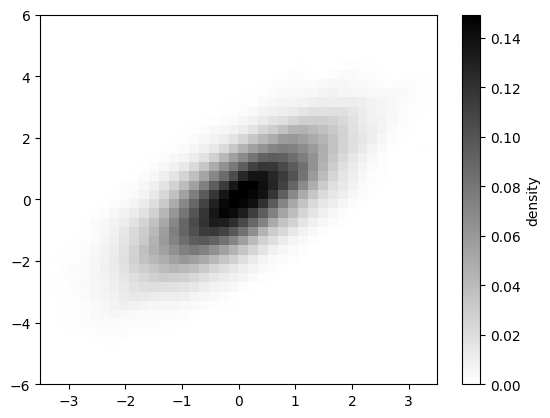

In [67]:
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)


xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto',extent=[-3.5, 3.5, -6, 6], cmap=plt.cm.binary)
cb = plt.colorbar()
cb.set_label('density')